# EDA SINIESTROS VIALES

In [139]:
# Importamos las librerias que se utilizaran 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

----------------------------------------------------------------------------------------------------------

### Se utilizara datos sin transformar para dar una breve introduccion a la clase de datos que nos vamos a encontrar dentro de los xlsx
### Posteriormente se hara el uso de datos con las transformaciones ya realizadas

In [140]:
hechos = pd.read_excel('datasets/homicidios.xlsx', sheet_name='HECHOS')
hechos.head(5) 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [141]:
victimas = pd.read_excel('datasets/homicidios.xlsx', sheet_name='VICTIMAS')
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


## Revisamos cuantos valores nulos tiene cada dataframe

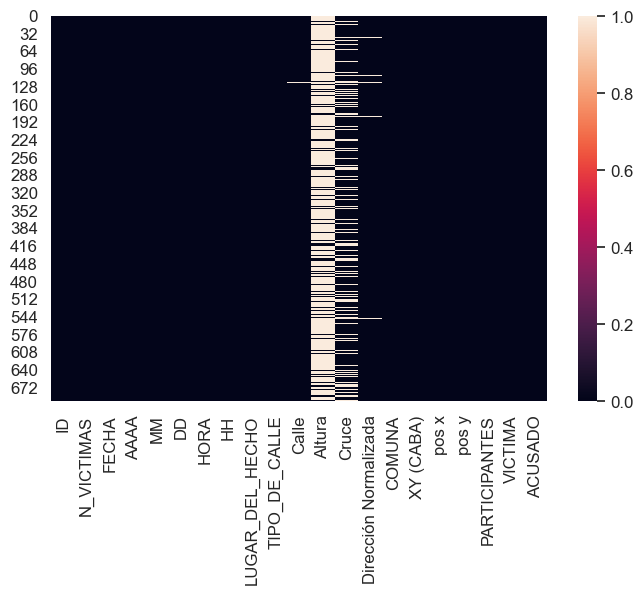

In [142]:
# Revisamos si dentro del df de hechos hay valores nulos
sns.heatmap(hechos.isnull())
plt.show()

* Las columnas conmayor concentracion de valores nulos son las de 'Altura' y 'Cruce' entonces procederemos a eliminarlas ya que no seran utilizadas 
* Posteriormente las columnas 'Altura' y 'Cruce' seran eliminadas por alta concentracion de valores nulos

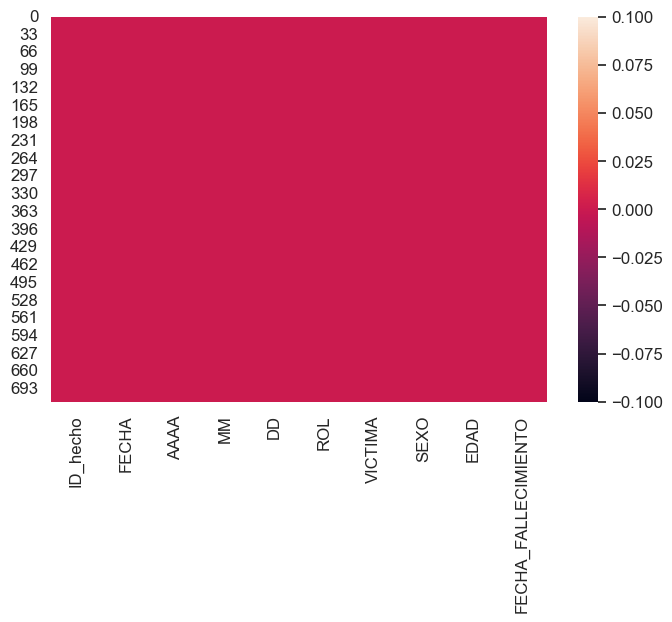

In [143]:
# Procedemos a hacer el mismo analisis con el df de victimas 
sns.heatmap(victimas.isnull())
plt.show()

* Como se puede observar este df esta sin valores nulos pero esto no quiere decir que los valores ingresados sean los correctos

### NUBE DE PALABRAS

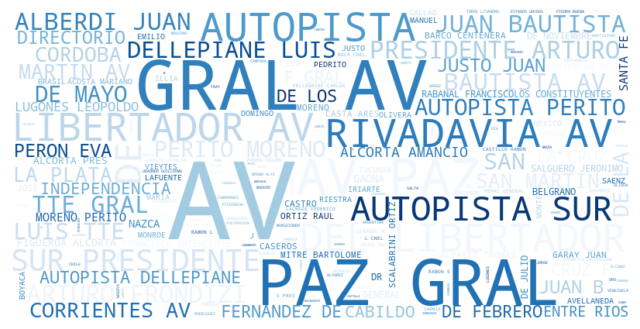

In [144]:
hechos['Calle'] = hechos['Calle'].fillna('').astype(str)

nube = hechos['Calle']

texto = ' '.join(nube)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto)

# Mostrar la nube de palabras utilizando Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### HISTOGRAMA

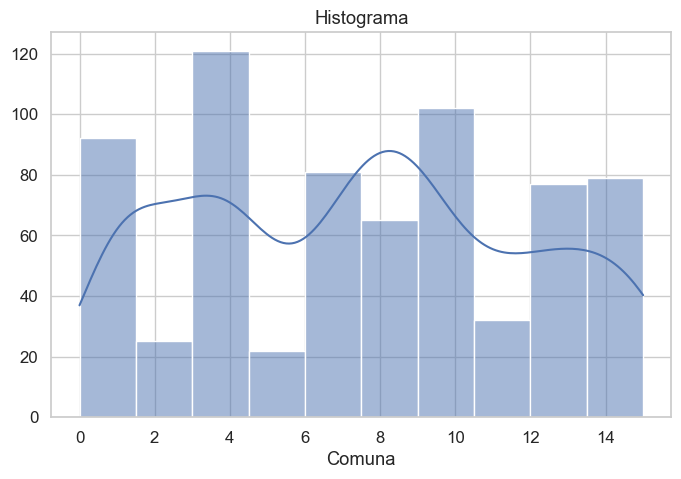

In [145]:
sns.histplot(hechos['COMUNA'], bins=10, kde=True)
plt.xlabel("Comuna")
plt.ylabel('')
plt.title('Histograma')
plt.show()

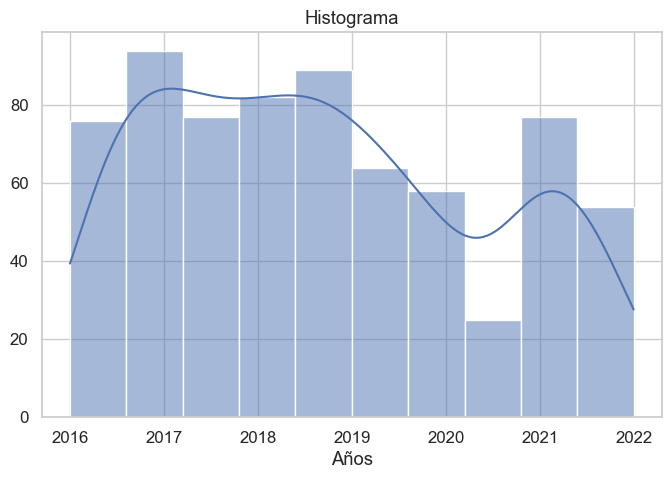

In [146]:
sns.histplot(hechos['FECHA'], bins=10, kde=True)
plt.xlabel("Años")
plt.ylabel('')
plt.title('Histograma')
plt.xlim()
plt.show()

### KDE

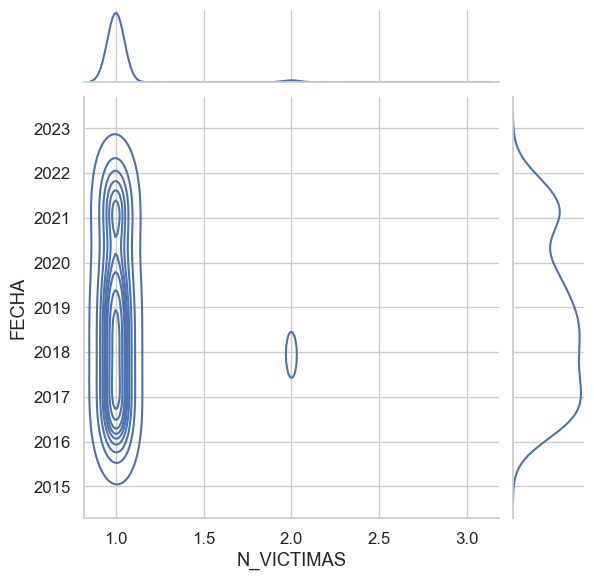

In [147]:
#KDE
sns.jointplot(x='N_VICTIMAS', y='FECHA', kind='kde', data=hechos)
plt.show()

### RANGO ETARIO

In [148]:
top_victimas = victimas['EDAD'].value_counts().nlargest(20)
top_victimas.head(20)

EDAD
SD    53
30    28
29    24
23    24
27    20
28    20
24    18
21    17
32    16
39    16
20    16
60    15
35    15
26    15
36    14
22    14
25    13
37    13
43    13
41    13
Name: count, dtype: int64

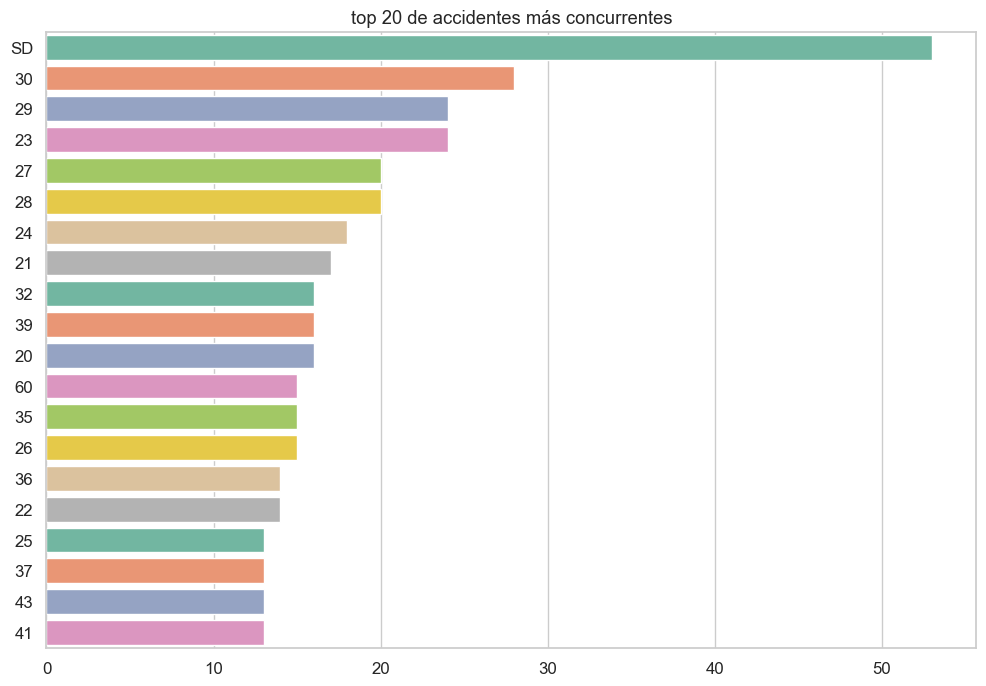

In [149]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_victimas.index, x=top_victimas.values, palette="Set2")
plt.xlabel('')
plt.ylabel('')
plt.title('top 20 de accidentes más concurrentes')
plt.show()

In [151]:
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')

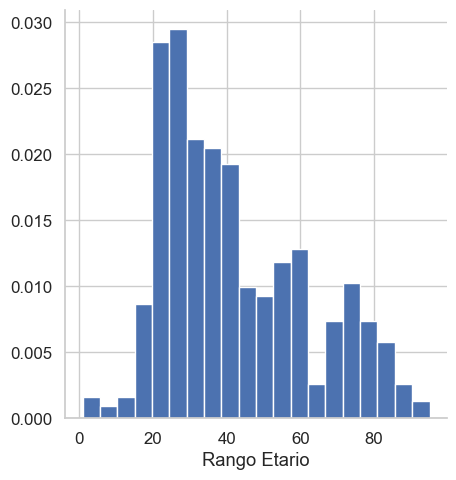

In [152]:
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.displot(
    data=victimas,
    x='EDAD',
    bins=20,
    kde=False,
    alpha=1,  # Esto establece la transparencia directamente
    stat='density'  # Cambia 'density' a 'count' si prefieres mostrar el conteo
).set(xlabel='Rango Etario', ylabel='')  # O cambia a 'Count' si usas 'stat=count'

plt.show()

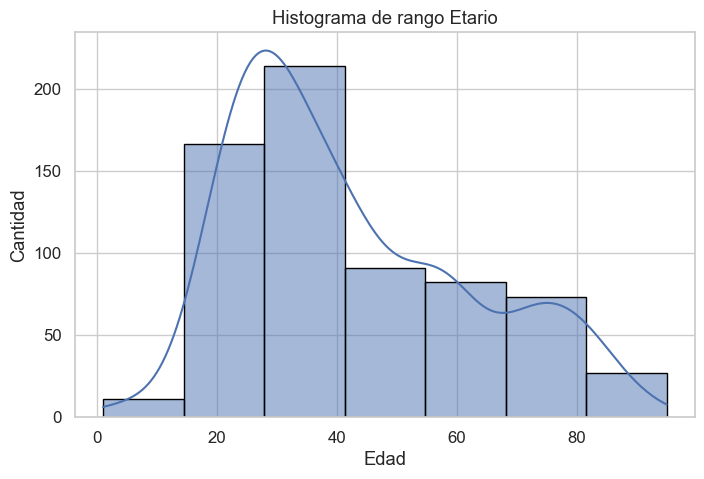

In [155]:
# Sacamos el rango Etario:
sns.set_style('whitegrid')

#Crear el histograma
sns.histplot(victimas['EDAD'], bins=7, kde=True, edgecolor= 'black', palette="Set2")

#Añadir título y etiquetas
plt.title("Histograma de rango Etario")
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

* Gracias a este grafico puedo identificar que no contamos con datos sobre la edad de las victimas de accidentes viales


### Gráfico de dispersión

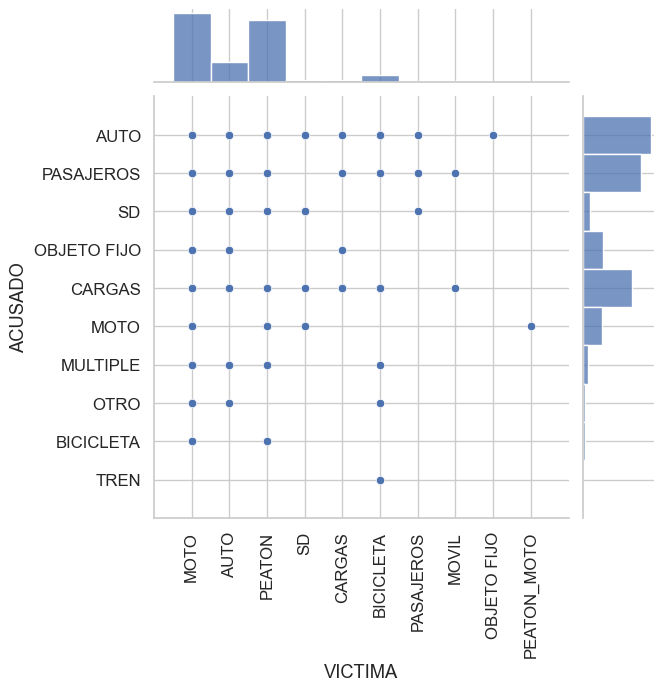

In [116]:
g = sns.jointplot(x='VICTIMA', y='ACUSADO', data=hechos)

# Rotar las etiquetas del eje x
g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

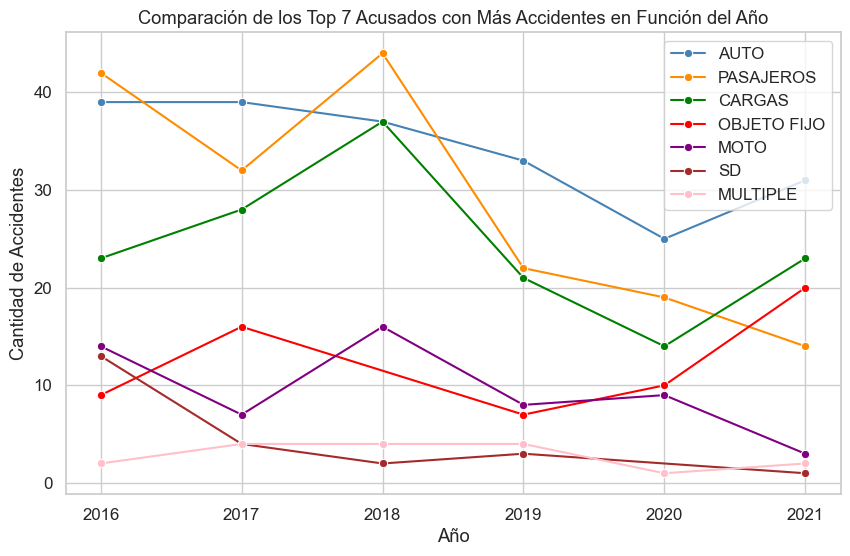

In [165]:
# Convierte 'fecha' en formato datetime.
hechos['FECHA'] = pd.to_datetime(hechos['FECHA'])

# Agregar una columna 'año' para extraer el año de la fecha
hechos['año'] = hechos['FECHA'].dt.year

# Contar la cantidad de accidentes por tipo de acusado y año
accidentes_por_acusado_y_año = hechos.groupby(['ACUSADO', 'año']).size().reset_index(name='cantidad_accidentes')

# Seleccionar los 10 tipos de acusados con más accidentes
top_7_acusados = accidentes_por_acusado_y_año.groupby('ACUSADO')['cantidad_accidentes'].sum().nlargest(7).index

# Crear un lineplot para comparar la cantidad de accidentes por acusado en función del año
plt.figure(figsize=(10, 6))

# Lista de colores para trazar las líneas
colores = ['steelblue', 'darkorange', 'green', 'red', 'purple', 'brown', 'pink']

for acusado, color in zip(top_7_acusados, colores):
    subset = accidentes_por_acusado_y_año[accidentes_por_acusado_y_año['ACUSADO'] == acusado]
    sns.lineplot(data=subset, x='año', y='cantidad_accidentes', label=acusado, marker='o', color=color)

plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Comparación de los Top 7 Acusados con Más Accidentes en Función del Año')
plt.legend(loc='upper right')
plt.show()


### Conseguimos los 20 tipos de accidentes más concurrentes

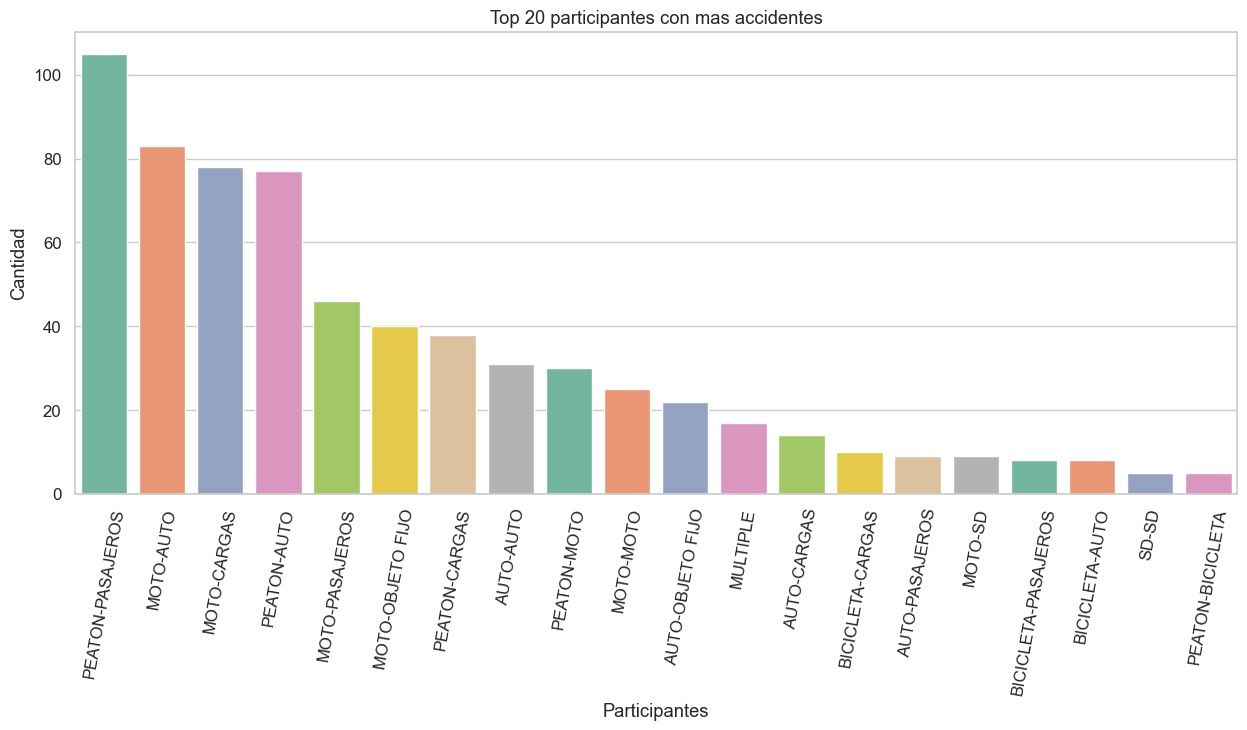

In [118]:
# Obtener los 20 participantes que más aparecen excluyendo NaN
top_20 = hechos['PARTICIPANTES'].value_counts().head(20)

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=top_20.index, y=top_20.values, palette="Set2")
ax.set_title('Top 20 participantes con mas accidentes')
ax.set_xlabel('Participantes')
ax.set_ylabel('Cantidad')

# Rotar las etiquetas del eje X para una mejor legibilidad
plt.xticks(rotation=80)

plt.show()

In [119]:
top_participantes = hechos['PARTICIPANTES'].value_counts().nlargest(20)
top_participantes.head(20)

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
Name: count, dtype: int64

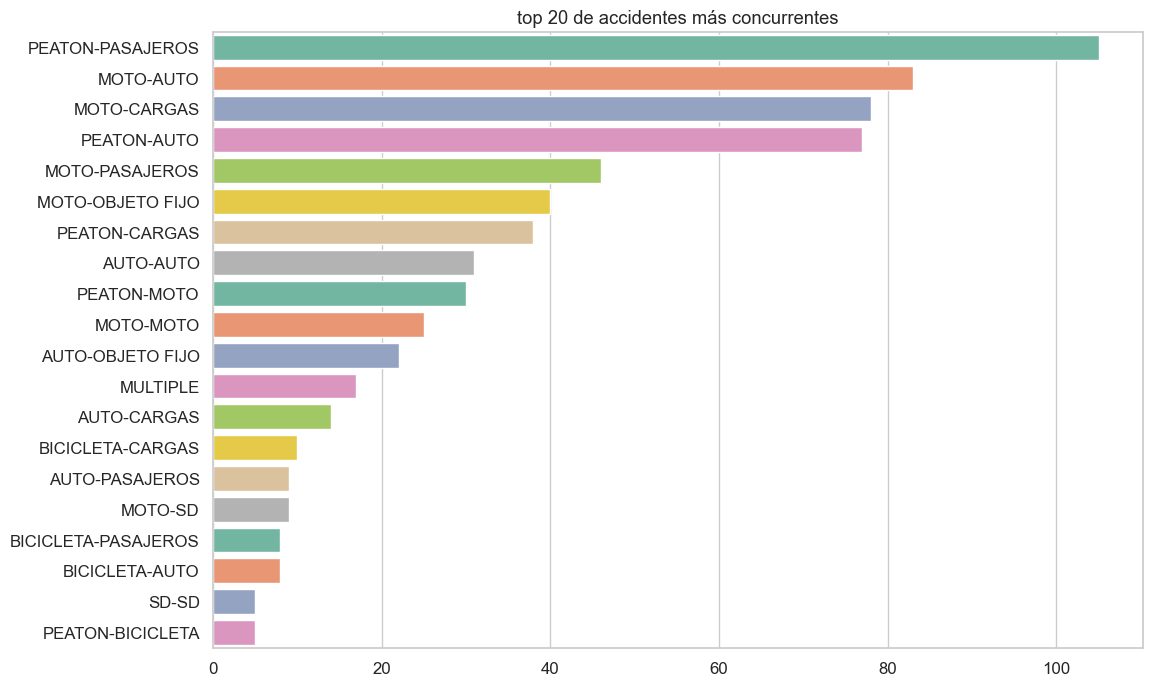

In [121]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_participantes.index, x=top_participantes.values, palette="Set2")
plt.xlabel('')
plt.ylabel('')
plt.title('top 20 de accidentes más concurrentes')
plt.show()

### ACCIDENTES POR DIA/MES

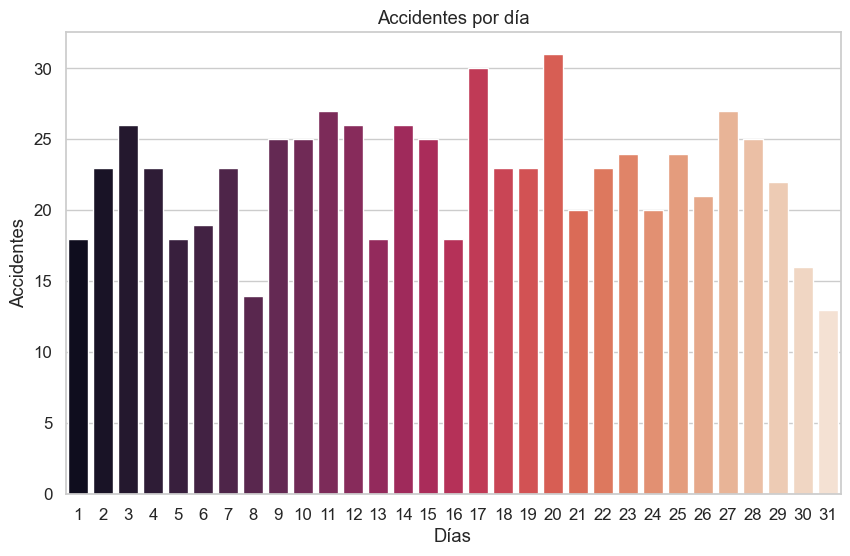

In [96]:
# Cuenta la frecuencia de cada día en la columna
day_counts = hechos['FECHA'].dt.day.value_counts().sort_index()

# Nombres de los día en formato corto
dias = list(range(1,32))

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=dias, y=day_counts, palette="rocket")
ax.set_title('Accidentes por día')
ax.set_xlabel('Días')
ax.set_ylabel('Accidentes')

plt.show()

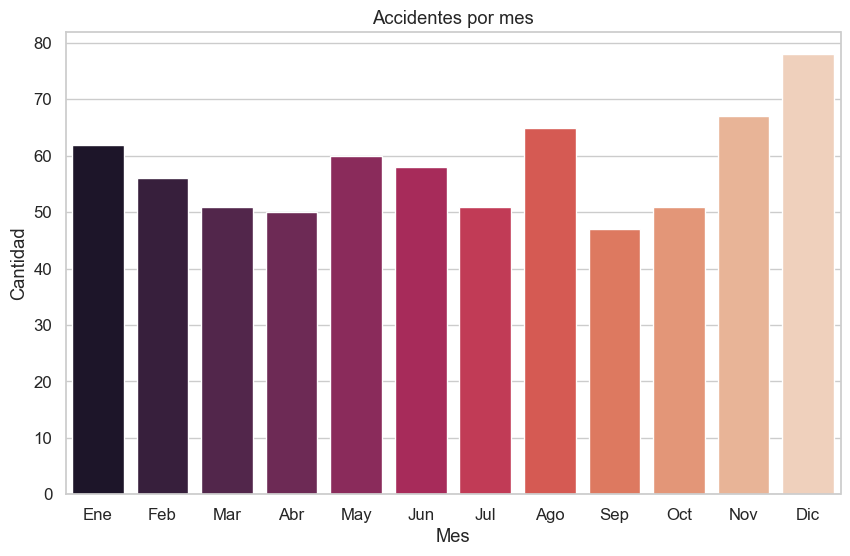

In [97]:
# Cuenta la frecuencia de cada mes en la columna
month_counts = hechos['FECHA'].dt.month.value_counts().sort_index()

# Nombres de los meses en formato corto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=meses, y=month_counts, palette="rocket")
ax.set_title('Accidentes por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

plt.show()

### Distribucion de genero

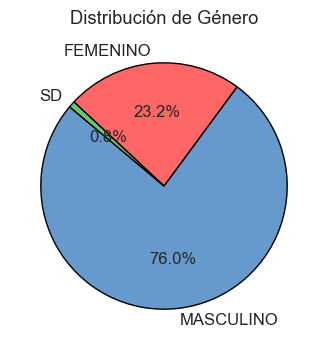

In [68]:
conteo_genero = victimas['SEXO'].value_counts()

plt.figure(figsize=(4,4))

colores = ['#6699CC', '#FF6666', '#66CC66']


plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "black"}, startangle=140, colors=colores, textprops={'fontsize': 12})

# Añadir título
plt.title('Distribución de Género')

# Mostrar el diagrama de pastel
plt.show()

#### Teniendo un breve vistazo a los datos se procede a realizar un proceso de ETL

-----------------------------------------------------------------------------------------------------------------


## KPIS

---------------------------
-----------------------------------------------------------------------------------------------------------------

## Hecho el proceso de ETL/EDA continuamos con el proceso de creacion de un dashboard